# Q1.

**Investigate the nature of critical points for the following functions**

$$
1. f(x, y) = x^3-3x^2 + y^2
$$

![](1.1.jpeg)

$$
2. f(x,y) = x^2 + xy + y^2 + \frac{1}{x} + \frac{1}{y}, x \neq 0, y \neq 0
$$

![](1.2_a.jpeg)

$$
\pagebreak
$$

![](1.2_b.jpeg)

$$
\pagebreak
$$

# Q2

**Using Lagrange Multipliers, show that**

a. The maximum value of $x^2y^3z^4$ subject to the constraint $2x + 3y + 4z = a$ is $(a/9)^9$
![](2.1_a.jpeg)

![](2.1_b.jpeg)

$$
\pagebreak
$$

b. The minimum value of $yz + zx + xy$ subject to the constraint $xyz=a^2(x + y + z)$ is $9a^2$
![](2.2_a.jpeg)

![](2.2_b.jpeg)

$$
\pagebreak
$$

# Q3

Find the minimum of $f(x,y) = \alpha x^2 + \beta y^2$ for various values of $\alpha, \beta$, by

a. computing the gradient of $f, \tau$

![](3.jpeg)

b. coding the iterations in Python with initial values $x_0=3,y_0=4$ and using the stopping criteria as $|f (j + 1) − f (j)| < \epsilon = 1e^{−6}$

Estimate the order of convergence by plotting the error against number of iterations for a few cases.

In [1]:
from typing import Tuple
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.6f}".format

# Define the staring points as constants
START_X = 3.0
START_Y = 4.0

In [2]:
def compute_function_value(alpha:float, beta:float, x:float, y:float) -> float:
    """[Given the value of alpha, beta and the point, maps x,y in domain
    of f to another real number as per the definition of f]

    Args:
        alpha (float): [The co-efficient of x^2]
        beta (float): [The co-efficient of y^2]
        x (float): [x value]
        y (float): [y value]

    Returns:
        [float]: [Function value]
    """
    return alpha * (x ** 2) + beta * (y ** 2)

In [3]:
def compute_tau(alpha: float, beta:float, x:float, y:float) -> float:
    """[Compute tau value for the given function based on the following
    psi(tau) = xi - tau * grad(f)
    F(psi) = f(psi(tau))
    dF/dtau = 0 -> Solve for tau in terms of x and y
    ]

    Args:
        alpha (float): [The co-efficient of x^2]
        beta (float): [The co-efficient of y^2]
        x (float): [x value]
        y (float): [y value]

    Returns:
        [float]: [Tau value at a point (x,y) for the given function]
    """
    return 0.5 * ((alpha **2) * (x **2) + (beta **2) * (y ** 2)) / ((alpha ** 3) * (x ** 2) + (beta ** 3) * (y ** 2))


In [4]:
def update_variables(alpha: float, beta: float, x: float, y:float) -> Tuple:
    """[Perform update step in the opposite direction as gradient with the update parameter tau]

    Args:
        alpha (float): [The co-efficient of x^2]
        beta (float): [The co-efficient of y^2]
        x (float): [x value]
        y (float): [y value]

    Returns:
        Tuple: [Updated values of x,y after performing the step]
    """
    tau = compute_tau(alpha, beta, x, y)
    x_updated = x - 2 * alpha * tau * x
    y_updated = y - 2 * beta * tau * y
    return (x_updated, y_updated)

In [5]:
def optimize_function(alpha: float, beta: float, epsilon: float = 1e-6, plot:bool = True):
    """[Optimize the function alpha*x^2 + beta*y^2 until the optimal solution converges with a threshold of 1e-6]

    Args:
        alpha (float): [The co-efficient of x^2]
        beta (float): [The co-efficient of y^2]
        epsilon (float, optional): [Threshold of convergence]. Defaults to 1e-6.
        plot (bool, optional): [Whether to plot the progress of optimization process]. Defaults to True.
    """

    # Define the starting parameters
    error_margin = 1
    max_iterations = 100
    iteration_counter = 0
    x, y = START_X, START_Y
    f_current = compute_function_value(alpha, beta, x, y)
    entries = []

    # Optimize the solutions
    while error_margin > epsilon:
        
        # Put a hard break on iterations exceeding a set threshold number
        if iteration_counter > max_iterations:
            break

        # Compute the current value of the function
        entries.append([x, y, f_current, error_margin])

        # Update the variables
        x, y = update_variables(alpha, beta, x, y)

        # Compute function value at the updated step and update the 
        # stopping criterion
        f_new = compute_function_value(alpha, beta, x, y)
        error_margin = abs(f_new - f_current)

        # Make the new value to be the current value
        f_current = f_new

        # Increase the iteration counter
        iteration_counter += 1
    
    # Add the last entry
    entries.append([x, y, f_current, error_margin])    
    
    # Create a summary dataframe and plot the function value and relative error at each point
    # During the execution of the optimization
    execution_summary = pd.DataFrame(entries, columns = ["x", "y", "function_value", "delta_f"])
    plt.plot(execution_summary.delta_f.iloc[1:], linestyle = "solid")
    plt.title(f"Alpha: {alpha:.2f} Beta: {beta:.2f} Converged In: {iteration_counter:02d} iterations")
    plt.ylabel("Delta F")
    plt.xlabel("Iteration Counter")
    print(execution_summary)

Let $f = x^2 + 3y^2$

         x         y  function_value   delta_f
0 3.000000  4.000000       57.000000  1.000000
1 1.959184 -0.163265        3.918367 53.081633
2 0.206230  0.274973        0.269361  3.649006
3 0.134681 -0.011223        0.018517  0.250845
4 0.014177  0.018903        0.001273  0.017244
5 0.009258 -0.000772        0.000088  0.001185
6 0.000975  0.001299        0.000006  0.000081
7 0.000636 -0.000053        0.000000  0.000006
8 0.000067  0.000089        0.000000  0.000000


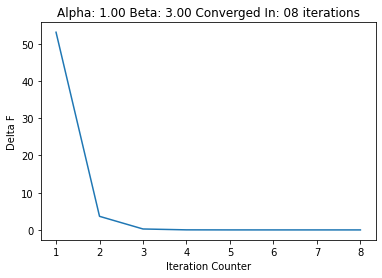

In [6]:
optimize_function(1, 3)

Let $f = 3x^2 + 5y^2$

         x         y  function_value    delta_f
0 3.000000  4.000000      107.000000   1.000000
1 1.069996 -0.288899        3.851984 103.148016
2 0.108000  0.143999        0.138671   3.713313
3 0.038520 -0.010400        0.004992   0.133679
4 0.003888  0.005184        0.000180   0.004812
5 0.001387 -0.000374        0.000006   0.000173
6 0.000140  0.000187        0.000000   0.000006
7 0.000050 -0.000013        0.000000   0.000000


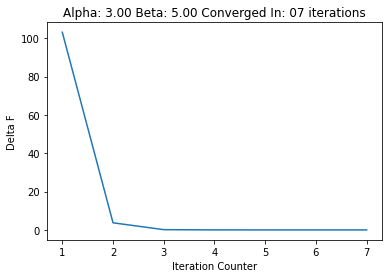

In [7]:
optimize_function(3, 5)

Let $f = 567^2 + 278y^2$

           x        y  function_value      delta_f
0   3.000000 4.000000    9,551.000000     1.000000
1  -0.540278 1.685603      955.377146 8,595.622854
2   0.300087 0.400116       95.565437   859.811709
3  -0.054044 0.168609        9.559317    86.006120
4   0.030017 0.040023        0.956209     8.603108
5  -0.005406 0.016866        0.095649     0.860560
6   0.003003 0.004003        0.009568     0.086081
7  -0.000541 0.001687        0.000957     0.008611
8   0.000300 0.000400        0.000096     0.000861
9  -0.000054 0.000169        0.000010     0.000086
10  0.000030 0.000040        0.000001     0.000009
11 -0.000005 0.000017        0.000000     0.000001


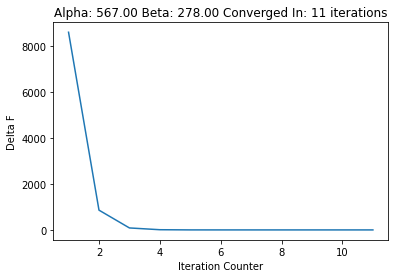

In [8]:
optimize_function(567, 278)

Let $f = 1.618x^2 + 2.81828y^2$

         x         y  function_value   delta_f
0 3.000000  4.000000       59.654480  1.000000
1 1.154760 -0.285458        2.387206 57.267274
2 0.120052  0.160069        0.095529  2.291677
3 0.046210 -0.011423        0.003823  0.091707
4 0.004804  0.006406        0.000153  0.003670
5 0.001849 -0.000457        0.000006  0.000147
6 0.000192  0.000256        0.000000  0.000006
7 0.000074 -0.000018        0.000000  0.000000


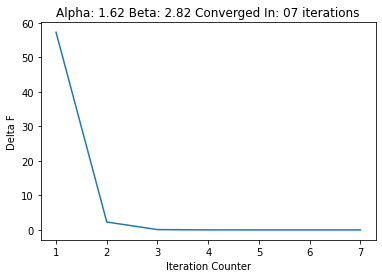

In [9]:
optimize_function(1.618, 2.81828)

As we can see from the plots above, the order of convergence is around 10 iterations for a tolerance value of $1e-6$ for a function of the form $f = \alpha x^2 + \beta y^2$